In [10]:
from scipy.stats import norm
from scipy.stats import binomtest

def confidence_interval(p_hat = 0.5, sample_size = 10000,alpha = 0.05, type='estimated', side='two'):
    ''' 
    0<=p_hat<=1  
    type: 'estimated' or 'precise'  
    side: 'two' or 'one'
    '''
    p = 100*p_hat
    
    if type == 'estimated':
        
        if side == 'two':
            std_hat = (p_hat * (1 - p_hat) / sample_size)**0.5
            z = norm.ppf(1-alpha/2) 

            p1 = 100*(p_hat - z*std_hat)
            p2 = 100*(p_hat + z*std_hat)
            print(f"[{p1:.6f}%,{p:.6f}%,{p2:.6f}%]\n{(p2-p1):.6f}%")
            # return [p1,p2]
        
    elif type == 'precise':
        
        if side == 'two':
            z = norm.ppf(1-alpha/2) 
            a = sample_size + z**2
            b = -2*sample_size*p_hat - z**2
            c = sample_size * p_hat**2

            p1 = 100*(-b - (b**2 - 4*a*c)**(1/2) )/2/a
            p2 = 100*(-b + (b**2 - 4*a*c)**(1/2) )/2/a
            print(f"[{p1:.6f}%,{p:.6f}%,{p2:.6f}%]\n{(p2-p1):.6f}%")
            # return [p1,p2]
            
        elif side == 'one':
            z = norm.ppf(1-alpha) 
            a = sample_size + z**2
            b = -2*sample_size*p_hat - z**2
            c = sample_size * p_hat**2

            p2 = 100*(-b + (b**2 - 4*a*c)**(1/2) )/2/a
            print(f"{p:.6f}%,{p2:.6f}%]\n{(p2-p):.6f}%")
            # return [p1,p2]

def proportion_test(p1, n1, p2, n2, alpha=0.05, alternative='two-sided'):
    """
    reject H0(p1 = p2) when p-value<alpha  
    0<=p1<=1  
    0<=p2<=1  
    alternative: 'two-sided', 'greater', 'less'  
    """
    x1 = p1 * n1
    x2 = p2 * n2
    p_pool = (x1 + x2) / (n1 + n2)
    std_hat = (p_pool * (1 - p_pool) * (1/n1 + 1/n2)) ** 0.5
    z = (p1 - p2) / std_hat

    if alternative == 'two-sided':
        p_value = 2 * (1 - norm.cdf(abs(z)))
    elif alternative == 'greater':
        p_value = 1 - norm.cdf(z)
    elif alternative == 'less':
        p_value = norm.cdf(z)
        
    print(f"z = {z:.4f}, p-value = {p_value:.4g}")
    if p_value < alpha:
        print("Reject H0(p1 = p2)")
    else:
        print("Fail to reject H0(p1 = p2)")
    return z, p_value

In [11]:
p, n = 0.00153 / 100.0 , 10 ** 7
p, n = 0.1263 / 100.0 , 10 ** 6

# confidence_interval(p, n, type='estimated', side='two')
confidence_interval(p, n, type='precise', side='two')
# confidence_interval(p, n, type='precise', side='one')

[0.119528%,0.126300%,0.133455%]
0.013927%


In [12]:
k, n = 2, 10**6
binomtest(k, n).proportion_ci(method='wilson', confidence_level=0.95)

ConfidenceInterval(low=5.484723095960564e-07, high=7.29295638857263e-06)

### 样本来自指定分布检验

In [13]:
binomtest(19,10**6,p=0.0002)

BinomTestResult(k=19, n=1000000, alternative='two-sided', statistic=1.9e-05, pvalue=1.355126332315901e-60)

### 两样本同分布检验

In [14]:

p_x, n_x = 0.097 / 100.0 , 10 ** 6
p_y, n_y = 0.1263 / 100.0 , 10 ** 6

proportion_test(p_x, n_x, p_y, n_y, alternative='two-sided')

z = -6.2039, p-value = 5.508e-10
Reject H0(p1 = p2)


(-6.20391500365997, 5.50755441253159e-10)

In [20]:
import numpy as np
import seaborn as sns

In [21]:
v0 = 0.30
np.ceil(124.1  / 0.47/ v0)

881.0

In [25]:
n_size = 1000000
v = np.random.uniform(0.23, 0.37, n_size)
t = np.ceil(124.1  / 0.47/ v)

<Axes: ylabel='Count'>

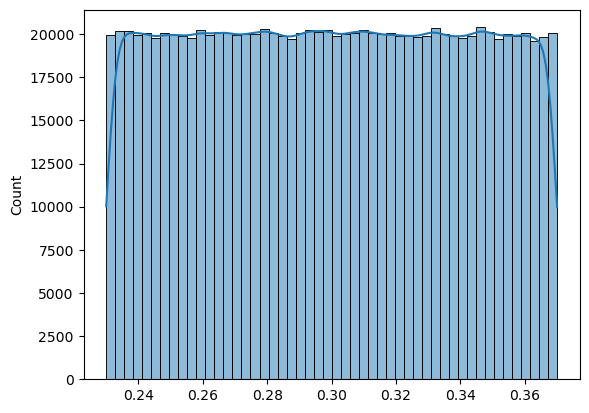

In [26]:
sns.histplot(v, bins=50, kde=True)

<Axes: ylabel='Count'>

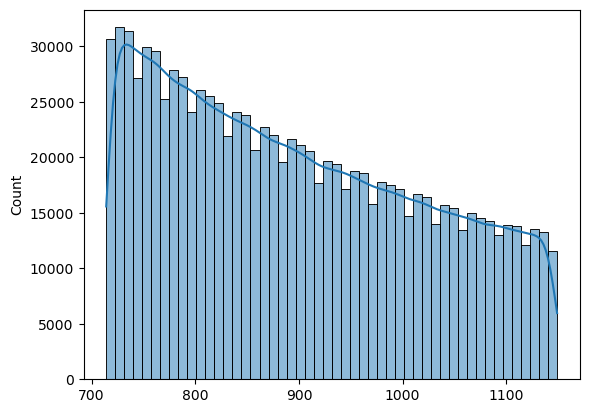

In [27]:
sns.histplot(t, bins=50, kde=True)